In [3]:
import random

In [28]:
class RockPaperScissors():
    def __init__(self, name):
        self.name = name
        self.choices = ['rock','paper', 'scissors']

    def get_computer_choice(self):
        return random.choice(self.choices)


    def get_user_choice(self):
        user_choice = input(f"please enter your choice ({self.choices}): ")
        if user_choice.lower() in self.choices:
            return user_choice.lower()
        print(f"Invalid choice! You must choose fron ({self.choices})")
        return self.get_user_choice()

    def decide_winner(self, user_choice, computer_choice):
        if user_choice == computer_choice:
            return "It's a tie!"
        win_combinations = [('rock', 'scissors'), ('paper', 'rock'), ('scissors', 'paper')]
        for win_comb in win_combinations:
            if (user_choice == win_comb[0]) & (computer_choice == win_comb[1]):
                return 'Congratulations! You won!'
        return "Oh! The computer won!"


    def play(self):
        user_choice = self.get_user_choice()
        computer_choice = self.get_computer_choice()
        print(f"user_choice: {user_choice},\ncomputer_choice: {computer_choice}")
        print(self.decide_winner(user_choice, computer_choice))




The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


In [29]:
game = RockPaperScissors('Elham')
while True:
    game.play()

    continue_game = input('Do you want to play again? (Enter any key to play again. Enter q/Q to exit!)')
    if continue_game.lower() == 'q':
        break

user_choice: rock,
computer_choice: scissors
Congratulations! You won!
user_choice: rock,
computer_choice: paper
Oh! The computer won!
user_choice: paper,
computer_choice: scissors
Oh! The computer won!
user_choice: paper,
computer_choice: paper
It's a tie!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of samples
n_samples = 10000

# Proposal distribution: q(x) ~ N(0, 1)
proposal_samples = np.random.normal(loc=0, scale=1, size=n_samples)
q_pdf = lambda x: (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)
# Unnormalized target density (known up to constant)
unnormalized_p = lambda x: np.exp(-x**4 / 4)

# Function we want to compute expectation of under p
h = lambda x: x**2

# Importance weights (unnormalized)
weights_unnormalized = unnormalized_p(proposal_samples) / q_pdf(proposal_samples)

# Normalize weights
weights = weights_unnormalized / np.sum(weights_unnormalized)

# Estimate E_p[h(x)]
estimate = np.sum(h(proposal_samples) * weights)
print("Estimated E_p[x^2] ≈", estimate)


[1.25011716e-04 1.07040317e-04 1.13667678e-04 ... 1.09570435e-04
 9.80270017e-05 1.17403575e-04]
Estimated E_p[x^2] ≈ 0.681435600055153


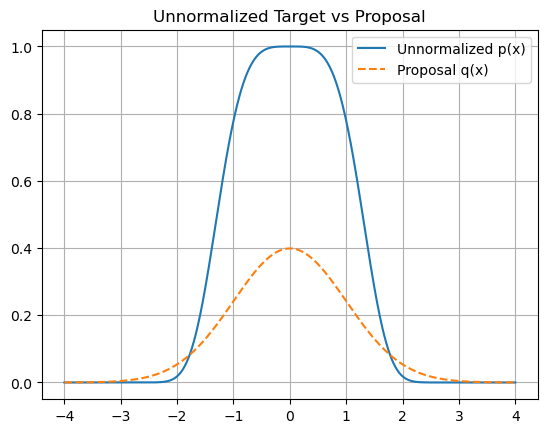

In [6]:
# Plot target vs proposal (unnormalized)
x_vals = np.linspace(-4, 4, 500)
plt.plot(x_vals, unnormalized_p(x_vals), label='Unnormalized p(x)')
plt.plot(x_vals, q_pdf(x_vals), label='Proposal q(x)', linestyle='--')
plt.title("Unnormalized Target vs Proposal")
plt.legend()
plt.grid(True)
plt.show()
